In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, PrecisionRecallDisplay, precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV


In [ ]:
url=r"cardio_train.csv"
colnames=['Age','Gender','Height', 'Weight','Systolic Blood Pressure', 'Diastolic Blood Pressure','Cholesterol', 'Glucose', 'Smoking', 'Alcohol Intake','Physical Activity', 'Diagnosis']
df = pd.read_csv(url, names = colnames, skiprows =1, delimiter=';')
df

,Age,Gender,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Cholesterol,Glucose,Smoking,Alcohol Intake,Physical Activity,Diagnosis
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### EDA

In [ ]:
#converting age to year
df['Age']=df['Age'].div(365).round()
df['Age']=df['Age'].astype(int)
df['Weight']=df['Weight'].astype(int)

#creating BMI attribute from weight and height attribute
df['BMI']=(df['Weight']/(df['Height'] **2) * 10000)
df['BMI']=df['BMI'].round(1)

In [ ]:
df

,Age,Gender,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Cholesterol,Glucose,Smoking,Alcohol Intake,Physical Activity,Diagnosis,BMI
0,50,2,168,62,110,80,1,1,0,0,1,0,22.0
1,55,1,156,85,140,90,3,1,0,0,1,1,34.9
2,52,1,165,64,130,70,3,1,0,0,0,1,23.5
3,48,2,169,82,150,100,1,1,0,0,1,1,28.7
4,48,1,156,56,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,2,168,76,120,80,1,1,1,0,1,0,26.9
99995,62,1,158,126,140,90,2,2,0,0,1,1,50.5
99996,52,2,183,105,180,90,3,1,0,1,0,1,31.4
99998,61,1,163,72,135,80,1,2,0,0,0,1,27.1


In [ ]:
df1=df.copy()

In [ ]:
df1

,Age,Gender,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Cholesterol,Glucose,Smoking,Alcohol Intake,Physical Activity,Diagnosis,BMI
0,50,2,168,62,110,80,1,1,0,0,1,0,22.0
1,55,1,156,85,140,90,3,1,0,0,1,1,34.9
2,52,1,165,64,130,70,3,1,0,0,0,1,23.5
3,48,2,169,82,150,100,1,1,0,0,1,1,28.7
4,48,1,156,56,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,2,168,76,120,80,1,1,1,0,1,0,26.9
99995,62,1,158,126,140,90,2,2,0,0,1,1,50.5
99996,52,2,183,105,180,90,3,1,0,1,0,1,31.4
99998,61,1,163,72,135,80,1,2,0,0,0,1,27.1


In [ ]:
#replacing binary values to categorical value for EDA

df1['Gender'] = df1['Gender'].replace({1 :'Female',2: 'Male'},inplace=False)
df1['Cholesterol']=df1['Cholesterol'].replace({1:'Normal',2:'High',3:'Extremely High'},inplace = False)
df1['Glucose'] =df1['Glucose'].replace({1:'Normal',2:'High',3:'Extremely High'},inplace = False)
df1['Smoking']=df1['Smoking'].replace({1: 'Yes',0:'No'},inplace = False)
df1['Alcohol Intake'] =df1['Alcohol Intake'].replace({1: 'Yes',0:'No'},inplace = False)
df1['Physical Activity']=df1['Physical Activity'].replace({1: 'Yes',0:'No'},inplace = False)
df1['Diagnosis'] = df1['Diagnosis'].replace({1: 'Yes',0:'No'},inplace = False)

In [ ]:
df1

,Age,Gender,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Cholesterol,Glucose,Smoking,Alcohol Intake,Physical Activity,Diagnosis,BMI
0,50,Male,168,62,110,80,Normal,Normal,No,No,Yes,No,22.0
1,55,Female,156,85,140,90,Extremely High,Normal,No,No,Yes,Yes,34.9
2,52,Female,165,64,130,70,Extremely High,Normal,No,No,No,Yes,23.5
3,48,Male,169,82,150,100,Normal,Normal,No,No,Yes,Yes,28.7
4,48,Female,156,56,100,60,Normal,Normal,No,No,No,No,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,Male,168,76,120,80,Normal,Normal,Yes,No,Yes,No,26.9
99995,62,Female,158,126,140,90,High,High,No,No,Yes,Yes,50.5
99996,52,Male,183,105,180,90,Extremely High,Normal,No,Yes,No,Yes,31.4
99998,61,Female,163,72,135,80,Normal,High,No,No,No,Yes,27.1


In [ ]:
# To save pre-processed in the drive

# from google.colab import drive
# drive.mount('/content/drive')
# df.to_csv('cardio_updated.csv')
# !cp cardio_updated.csv "drive/My Drive/"

In [ ]:
df1.describe()

,Age,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,164.359229,74.204329,128.817286,96.630414,27.554774
std,6.765294,8.210126,14.395953,154.011419,188.472530,6.091999
min,30.000000,55.000000,10.000000,-150.000000,-70.000000,3.500000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.900000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.400000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,30.200000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000,298.700000


## Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


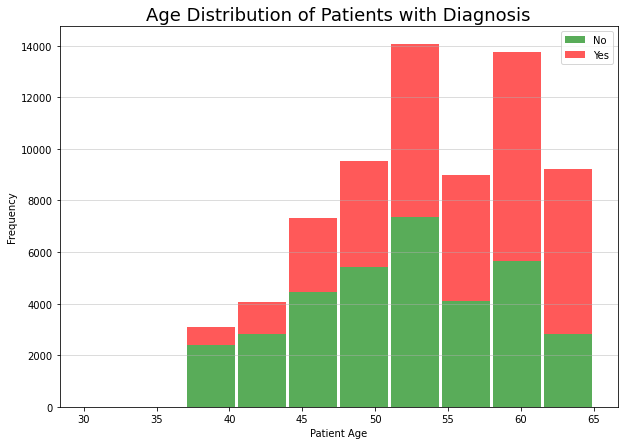

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
heartdis_yes = df1[df1['Diagnosis']=='Yes']['Age']
heartdis_no = df1[df1['Diagnosis']=='No']['Age']
n, bins, patches = plt.hist(x = [heartdis_no,heartdis_yes],stacked = True,color=['green', 'red'],alpha=0.65, rwidth=0.95)
plt.grid(axis='y', alpha=0.55)
plt.xlabel('Patient Age', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.title('Age Distribution of Patients with Diagnosis', fontsize = 18)
plt.legend(['No','Yes'], fontsize = 10);

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


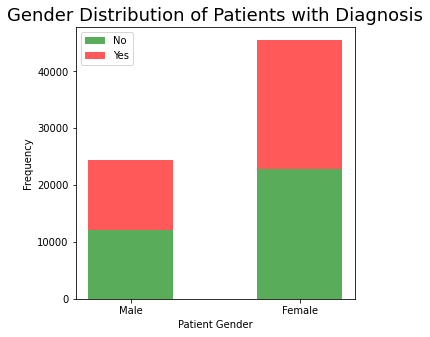

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
heartdis_yes = df1[df1['Diagnosis']=='Yes']['Gender']
heartdis_no = df1[df1['Diagnosis']=='No']['Gender']
bars=['Male','Female']
n, bins, patches = plt.hist(x = [heartdis_no,heartdis_yes],histtype='barstacked',color=['green', 'red'],bins=np.arange(3) - 0.5,alpha=0.65,rwidth=0.5)
plt.xlabel('Patient Gender', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.title('Gender Distribution of Patients with Diagnosis', fontsize = 18)
plt.legend(['No','Yes'], fontsize = 10);
plt.xticks(bars,ha='center');

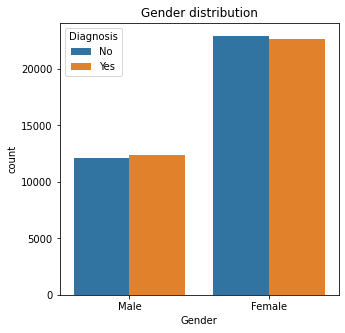

In [ ]:
plt.figure(figsize = [5,5])
sns.countplot(data = df1,x ='Gender',hue='Diagnosis');
plt.xlabel('Gender');
plt.title('Gender distribution');

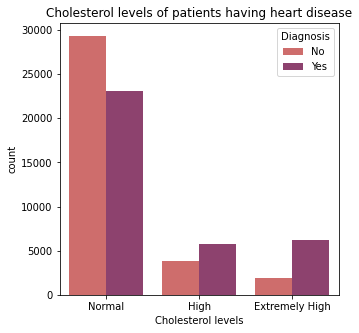

In [ ]:
plt.figure(figsize = [5,5])
sns.countplot(data = df1,x ='Cholesterol',hue='Diagnosis',palette='flare',order = df1['Cholesterol'].value_counts().index);
plt.xlabel('Cholesterol levels');
plt.title('Cholesterol levels of patients having heart disease');

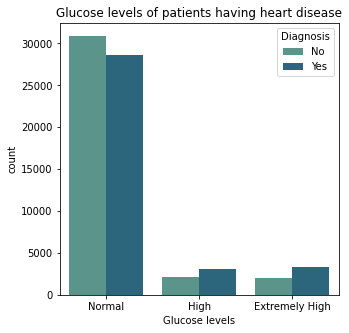

In [ ]:
plt.figure(figsize = [5,5])
sns.countplot(data = df1,x ='Glucose',hue='Diagnosis',palette='crest');
plt.xlabel('Glucose levels');
plt.title('Glucose levels of patients having heart disease');

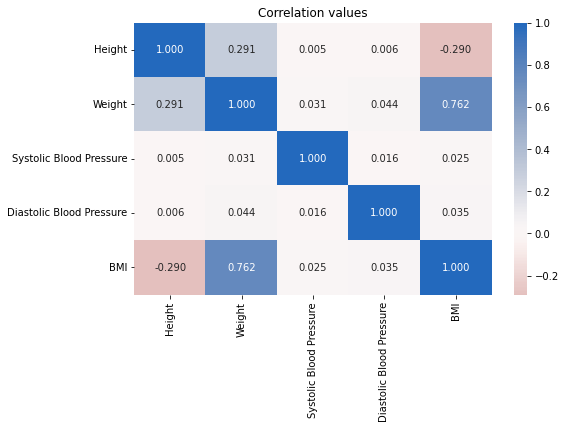

In [ ]:
numeric_vars = ['Height','Weight','Systolic Blood Pressure','Diastolic Blood Pressure','BMI']
plt.figure(figsize=[8,5])
sns.heatmap(df1[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.title('Correlation values')
plt.show()

In [ ]:
high_outliers = (df1['Systolic Blood Pressure']> 250) | (df1['Diastolic Blood Pressure'] >120)
df_new = df1.drop(df1.index[[high_outliers]])
low_outliers =(df_new['Systolic Blood Pressure']<40) | (df_new['Diastolic Blood Pressure'] <40)
df_new = df_new.drop(df_new.index[[low_outliers]])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


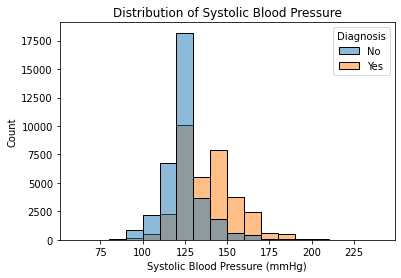

In [ ]:
s=sns.histplot(data=df_new,x='Systolic Blood Pressure',binwidth=10,hue='Diagnosis')
s.set_xlabel('Systolic Blood Pressure (mmHg)');
s.set_title('Distribution of Systolic Blood Pressure');

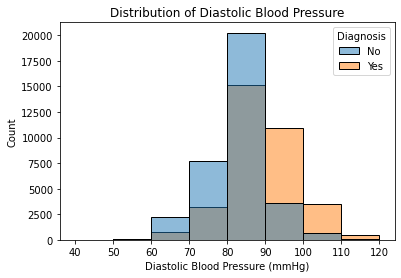

In [ ]:
d=sns.histplot(data=df_new,x='Diastolic Blood Pressure',binwidth=10,hue='Diagnosis');
d.set_xlabel('Diastolic Blood Pressure (mmHg)');
d.set_title('Distribution of Diastolic Blood Pressure');

## Random Forest Classifier

In [ ]:
X=df.loc[:, df.columns != 'Diagnosis']
Y=df[['Diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)


In [ ]:
#GridSeachCV

rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
}
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X,Y.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 250}


0.713 + or -0.007 for the {'max_depth': 2, 'n_estimators': 5}
0.717 + or -0.003 for the {'max_depth': 2, 'n_estimators': 10}
0.719 + or -0.006 for the {'max_depth': 2, 'n_estimators': 50}
0.719 + or -0.003 for the {'max_depth': 2, 'n_estimators': 100}
0.721 + or -0.003 for the {'max_depth': 2, 'n_estimators': 250}
0.723 + or -0.003 for the {'max_depth': 4, 'n_estimators': 5}
0.724 + or -0.004 for the {'max_depth': 4, 'n_estimators': 10}
0.728 + or -0.003 for the {'max_depth': 4, 'n_estimators': 50}
0.727 + or -0.003 for the {'max_depth': 4, 'n_estimators': 100}
0.728 + or -0.002 for the {'max_depth': 4, 'n_estimators': 250}
0.729 + or -0.002 for the {'max_depth': 8, 'n_estimators': 5}
0.731 + or -0.003 for the {'max_depth': 8, 'n_estimators': 10}
0.734 + or -0.002 for the {'max_depth': 8, 'n_estimators': 50}
0.733 + or -0.002 for the {'max_depth': 8, 'n_estimators': 100}
0.734 + or -0.002 for the {'max_depth': 8, 'n_estimator

In [ ]:
rf = RandomForestClassifier(max_depth=8,n_estimators = 200)
rf.fit(X_train,y_train);
y_pred=rf.predict(X_test)
y_pred=y_pred.round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


## Evaluation Metrics

In [ ]:
acc = accuracy_score(y_test,y_pred)
conf = confusion_matrix(y_test, y_pred)
print("Accuracy",acc)
print("\nConfusion Matrix\n",conf)
print(classification_report(y_test, y_pred))


Accuracy 0.7370714285714286

Confusion Matrix
 [[5622 1505]
 [2176 4697]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      7127
           1       0.76      0.68      0.72      6873

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



In [ ]:
report=classification_report(y_test, y_pred,output_dict=True)
dfreport = pd.DataFrame(report).transpose()
dfreport

,precision,recall,f1-score,support
0,0.720954,0.788831,0.753367,7127.000000
1,0.757336,0.683399,0.718470,6873.000000
accuracy,0.737071,0.737071,0.737071,0.737071
macro avg,0.739145,0.736115,0.735919,14000.000000
weighted avg,0.738815,0.737071,0.736235,14000.000000


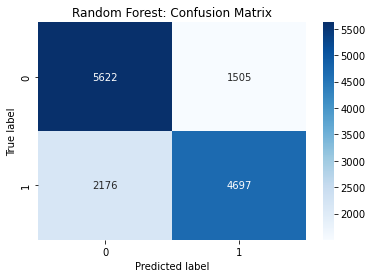

In [ ]:
h=sns.heatmap(conf,annot=True,cmap='Blues', fmt='g')
h.set_title("Random Forest: Confusion Matrix");
h.set_ylabel("True label");
h.set_xlabel("Predicted label");

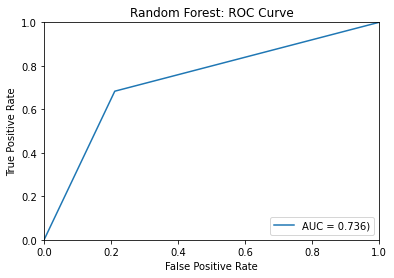

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC = %0.3f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest: ROC Curve')
plt.legend(loc="lower right");

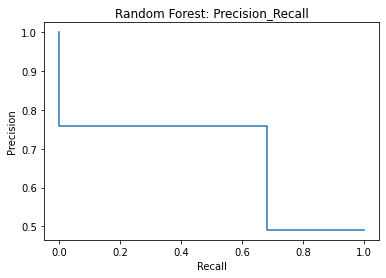

In [ ]:
#Precision Recall Curve
prec, rec, thresholds_2 = precision_recall_curve(y_test, y_pred)
r = PrecisionRecallDisplay(precision=prec, recall=rec)
r.plot()
plt.title("Random Forest: Precision_Recall")
plt.show()

## Only categorical value feature set

In [ ]:
X=df.loc[:, ['Gender','Cholesterol','Glucose'	,'Smoking',	'Alcohol Intake',	'Physical Activity'	]]
Y=df[['Diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
rf = RandomForestClassifier(max_depth=8,n_estimators = 250)
rf.fit(X_train,y_train);
y_pred=rf.predict(X_test)
y_pred=y_pred.round()
acc = accuracy_score(y_test,y_pred)
conf = confusion_matrix(y_test, y_pred)
print("Accuracy",acc)
print("\nConfusion Matrix\n",conf)
report=classification_report(y_test, y_pred,output_dict=True)
dfreport = pd.DataFrame(report).transpose()
dfreport

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy 0.5962142857142857

Confusion Matrix
 [[5403 1644]
 [4009 2944]]


,precision,recall,f1-score,support
0,0.574054,0.766709,0.656540,7047.000000
1,0.641674,0.423414,0.510181,6953.000000
accuracy,0.596214,0.596214,0.596214,0.596214
macro avg,0.607864,0.595062,0.583361,14000.000000
weighted avg,0.607637,0.596214,0.583852,14000.000000


## Only numerical value feature set

In [ ]:
X=df.loc[:, ['Age','Height','Weight',	'Systolic Blood Pressure',	'Diastolic Blood Pressure',	'BMI']]
Y=df[['Diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
rf = RandomForestClassifier(max_depth=8,n_estimators = 250)
rf.fit(X_train,y_train);
y_pred=rf.predict(X_test)
y_pred=y_pred.round()
acc = accuracy_score(y_test,y_pred)
conf = confusion_matrix(y_test, y_pred)
print("Accuracy",acc)
print("\nConfusion Matrix\n",conf)
report=classification_report(y_test, y_pred,output_dict=True)
dfreport = pd.DataFrame(report).transpose()
dfreport

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy 0.7233571428571428

Confusion Matrix
 [[5318 1646]
 [2227 4809]]


,precision,recall,f1-score,support
0,0.704838,0.763642,0.733062,6964.000000
1,0.745004,0.683485,0.712920,7036.000000
accuracy,0.723357,0.723357,0.723357,0.723357
macro avg,0.724921,0.723563,0.722991,14000.000000
weighted avg,0.725024,0.723357,0.722939,14000.000000
